# Experimentos com dados

Setup: https://github.com/lucasew/uv-jupyter-kernel
Python: 3.10

In [135]:
!uv pip install --no-progress requests pandas matplotlib scipy

Audited 4 packages in 6ms


In [19]:
import requests
import pandas as pd
from collections import defaultdict

In [93]:
import sqlite3

db = sqlite3.connect("data.db")
cursor = db.cursor()

In [81]:
data['parameters']

{'T2M': {'units': 'C', 'longname': 'Temperature at 2 Meters'},
 'RH2M': {'units': '%', 'longname': 'Relative Humidity at 2 Meters'},
 'WS10M': {'units': 'm/s', 'longname': 'Wind Speed at 10 Meters'},
 'T2MDEW': {'units': 'C', 'longname': 'Dew/Frost Point at 2 Meters'},
 'PRECTOTCORR': {'units': 'mm/hour', 'longname': 'Precipitation Corrected'}}

In [113]:
def get_weather_data(lat, lon, start, end):
    data = requests.get(
        'https://power.larc.nasa.gov/api/temporal/hourly/point',
         params={
                'community': 'ag',
                'parameters': 'T2M,RH2M,WS10M,T2MDEW,PRECTOTCORR',
                'latitude': lat,
                'longitude': lon,
                'start': start,
                'end': end,
                'format': 'json',
                'units': 'metric',
                'header': 'true'
         }
    ).json()
    # print(data)

    items = defaultdict(lambda: {})
    for k, v in data['properties']['parameter'].items():
        for dt, val in v.items():
            items[dt][k] = val
            items[dt]['date'] = dt
            items[dt]['latitude'] = lat
            items[dt]['longitude'] = lon

    def fill_value_to_nan(item):
        if item == data['header']['fill_value']:
            return float('nan')
        return item
    ret = pd.DataFrame(items.values()).map(fill_value_to_nan).dropna()
    ret['date'] = pd.to_datetime(ret['date'], format='%Y%m%d%H%M')
    return ret


In [114]:
d = get_weather_data(-23, -52, '20250904', '20250904')
d

,T2M,date,latitude,longitude,RH2M,WS10M,T2MDEW,PRECTOTCORR
0,23.31,2025-09-04 00:00:00,-23,-52,46.60,3.54,11.24,0.0
1,22.59,2025-09-04 00:01:00,-23,-52,47.77,3.15,10.97,0.0
2,21.90,2025-09-04 00:02:00,-23,-52,48.99,2.87,10.72,0.0
3,21.28,2025-09-04 00:03:00,-23,-52,50.10,2.80,10.50,0.0
4,20.75,2025-09-04 00:04:00,-23,-52,51.14,2.75,10.33,0.0
5,20.18,2025-09-04 00:05:00,-23,-52,52.61,2.77,10.23,0.0
6,19.58,2025-09-04 00:06:00,-23,-52,54.77,2.88,10.29,0.0
7,20.32,2025-09-04 00:07:00,-23,-52,53.83,4.14,10.72,0.0
8,22.59,2025-09-04 00:08:00,-23,-52,47.88,5.07,11.00,0.0
9,26.45,2025-09-04 00:09:00,-23,-52,37.53,6.04,10.73,0.0


<Axes: xlabel='date'>

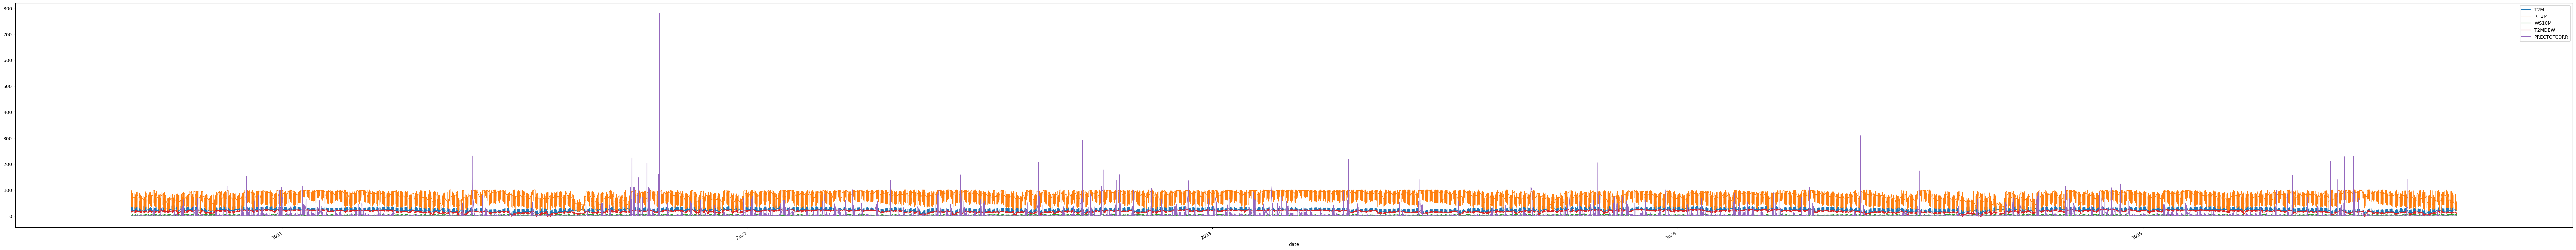

In [115]:
d = get_weather_data(-23, -52, '20200904', '20250904')
d.plot(figsize=(100,10), legend=True, x='date', y=['T2M', 'RH2M', 'WS10M', 'T2MDEW', 'PRECTOTCORR'])

            T2M                date  latitude  longitude       RH2M     WS10M  \
date                                                                            
1     27.113821 2023-01-01 05:37:00     -23.0      -52.0  67.421821  2.325845   
2     26.917155 2023-01-02 05:37:00     -23.0      -52.0  67.708345  2.408786   
3     26.796488 2023-01-03 05:37:00     -23.0      -52.0  67.483060  2.434560   
4     26.710952 2023-01-04 05:37:00     -23.0      -52.0  66.967821  2.556667   
5     26.585845 2023-01-05 05:37:00     -23.0      -52.0  66.742310  2.631286   
6     26.456607 2023-01-06 05:37:00     -23.0      -52.0  66.620607  2.713512   
7     26.447310 2023-01-07 05:37:00     -23.0      -52.0  66.137940  2.711143   
8     26.520714 2023-01-08 05:37:00     -23.0      -52.0  66.098679  2.621333   
9     26.598167 2023-01-09 05:37:00     -23.0      -52.0  66.748667  2.510595   
10    26.619750 2023-01-10 05:37:00     -23.0      -52.0  67.757548  2.544690   
11    26.680250 2023-01-11 0

<Axes: xlabel='date'>

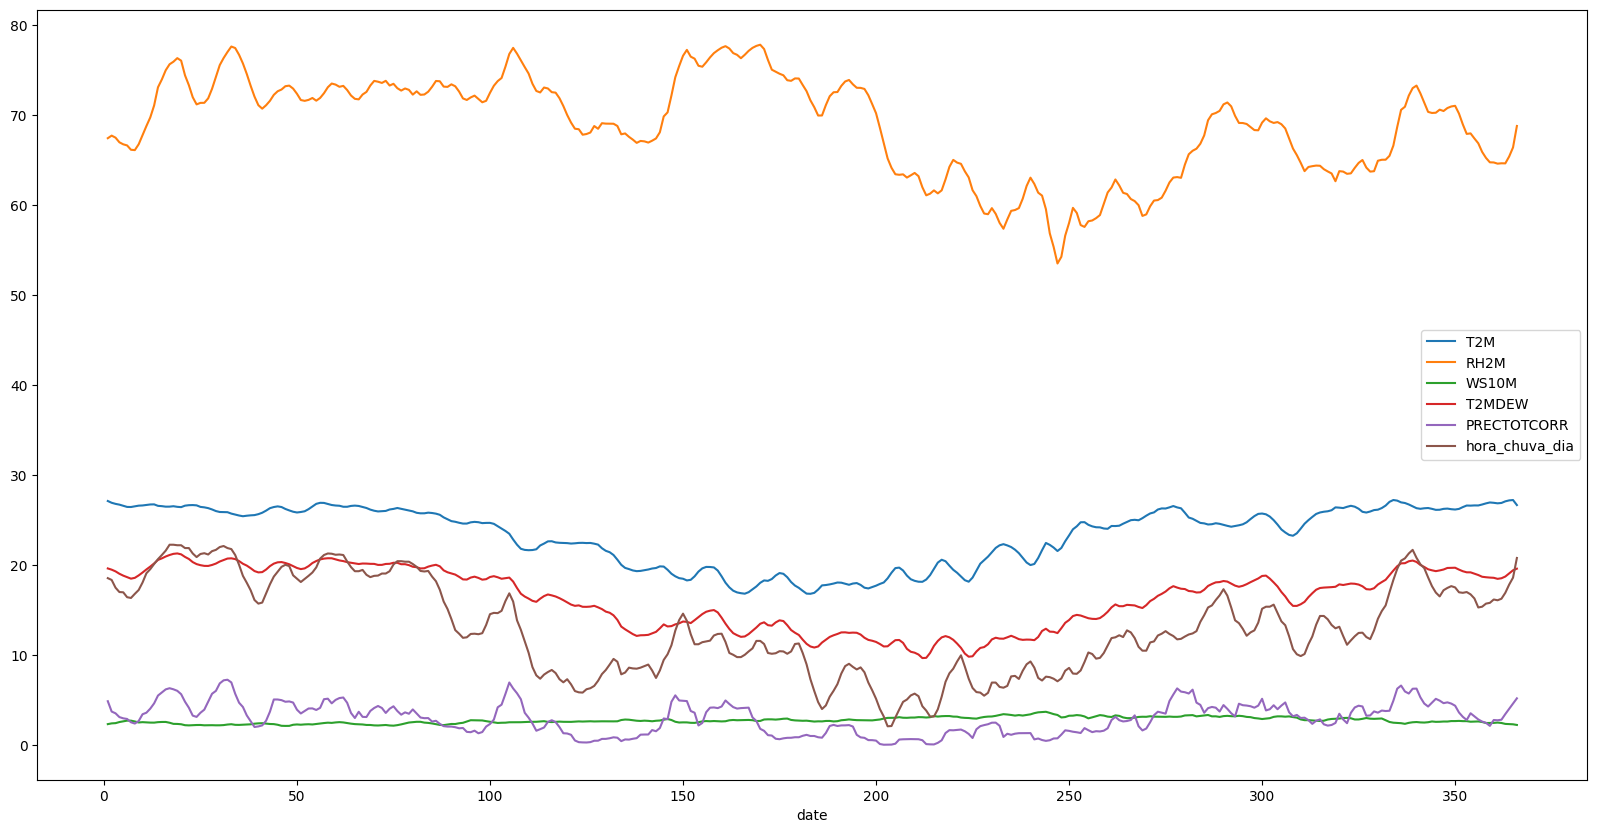

In [195]:
from scipy.interpolate import make_splprep
import numpy as np
from scipy.interpolate import make_interp_spline

campos = ['T2M', 'RH2M', 'WS10M', 'T2MDEW', 'PRECTOTCORR', 'hora_chuva_dia']
by_day = d.copy()
by_day = d.groupby(d['date'].dt.date).mean()
by_day['hora_chuva_dia'] = (d['PRECTOTCORR'] > 0).groupby(d['date'].dt.date).sum()
by_day.reindex(range(len(by_day)))

window_size = 7
convolution_window = np.ones(window_size) / window_size
for campo in campos:
    by_day[campo] = np.convolve(by_day[campo], convolution_window, mode='same')

by_day = by_day.groupby(by_day['date'].dt.day_of_year).mean()
print(by_day.head(20))
by_day.plot(figsize=(20,10), legend=True, y=campos)

In [109]:
get_weather_data(22, 22, '20251002', '20251002').dropna()

,T2M,date,latitude,longitude,RH2M,WS10M,T2MDEW,PRECTOTCORR


In [107]:
d.to_sql("weather_data", db, if_exists='replace', index=False)

43848

In [ ]:
cursor.execute("select count(*) from weather_data").fetchall()

[(1827,)]